#Outlier detection

In [281]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [283]:
path = "/content/gdrive/MyDrive/ML/Datasets/housing.csv"            # Иногда могут быть проблемы с кирилицей в названиях папок на пути к файлу, постарайтесь всегда использовтаь только латиницу.
data = pd.read_csv(path, sep = ",")                                 # Путь к файлу можно записать как отдельно, так и внутри метода read_csv.

In [284]:
data.head()

,0_feature,1_feature,2_feature,3_feature,4_feature,5_feature,6_feature,7_feature,8_feature,9_feature,10_feature,11_feature,12_feature,Class
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [285]:
data.shape

(506, 14)

In [286]:
y = data["Class"]
X = data.drop(["Class"], axis = 1)

#Как будем сравнивать?

In [287]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

SEED = 144

In [288]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = SEED)  # разделяем набор данных на тренировачную и тестовую выборку

In [289]:
X_train = X_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
X_val = X_val.reset_index(drop = True)
y_val = y_val.reset_index(drop = True)

In [290]:
lr = LinearRegression()
rf = RandomForestRegressor(random_state = SEED)

In [291]:
def get_score(model, X, y, X_val, y_val):
  model.fit(X, y)
  y_pred = model.predict(X_val)
  score = mean_absolute_error(y_val, y_pred)
  return score

In [292]:
%%time
baseline_lr_score = get_score(lr, X_train, y_train, X_val, y_val)
print('Linear Regression MAE: ', baseline_lr_score)

Linear Regression MAE:  3.536218716751226
CPU times: user 3.39 ms, sys: 12 µs, total: 3.4 ms
Wall time: 3.36 ms


In [293]:
%%time
baseline_rf_score = get_score(rf, X_train, y_train, X_val, y_val)
print('Random Forest MAE: ', baseline_rf_score)

Random Forest MAE:  2.6618137254901955
CPU times: user 324 ms, sys: 3.95 ms, total: 328 ms
Wall time: 328 ms


#С чем мы работаем?

In [294]:
from sklearn.manifold import TSNE

In [295]:
%%time
X_train_tsne = TSNE(n_components = 2).fit_transform(X_train)

CPU times: user 4.13 s, sys: 15 ms, total: 4.14 s
Wall time: 2.16 s


In [296]:
X_train_tsne = pd.DataFrame(X_train_tsne)
X_train_tsne.rename(columns = {0:'1-я компонента', 1:'2-я компонента'}, inplace = True)
X_train_tsne["Class"] = y_train
X_train_tsne.head()

,1-я компонента,2-я компонента,Class
0,35.296688,6.456231,11.9
1,-10.583771,-0.486377,22.2
2,-25.997355,-23.859715,13.8
3,34.183929,5.218290,15.2
4,33.333408,5.205548,21.9


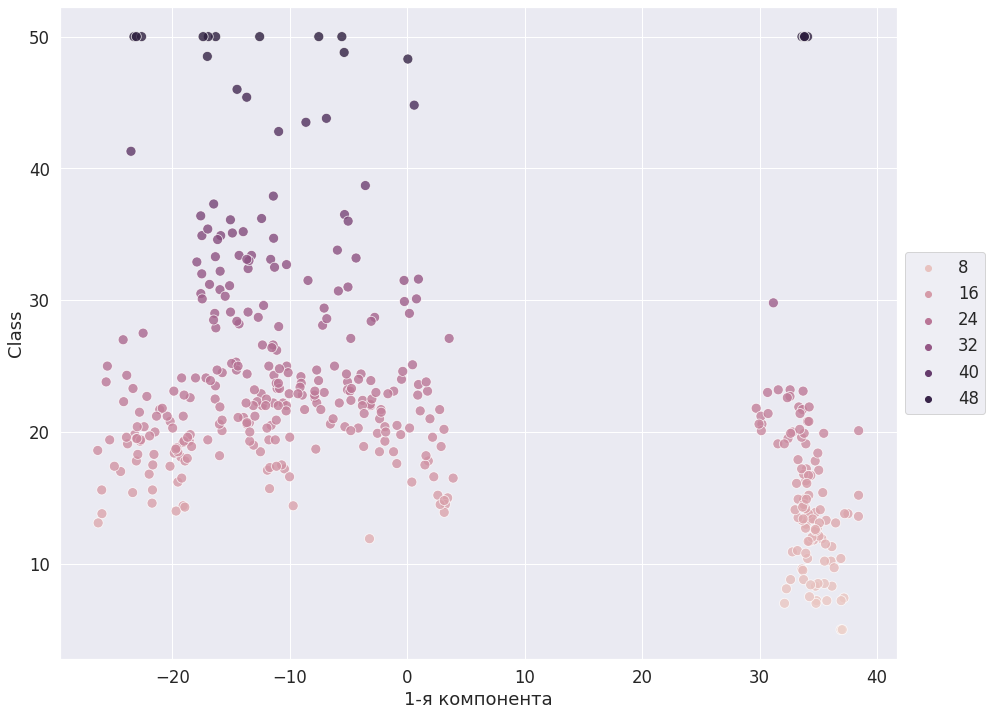

In [297]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 12))
g = sns.scatterplot(x = "1-я компонента", y = "Class", hue = "Class", data = X_train_tsne, s = 100, alpha = 0.8)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

No handles with labels found to put in legend.


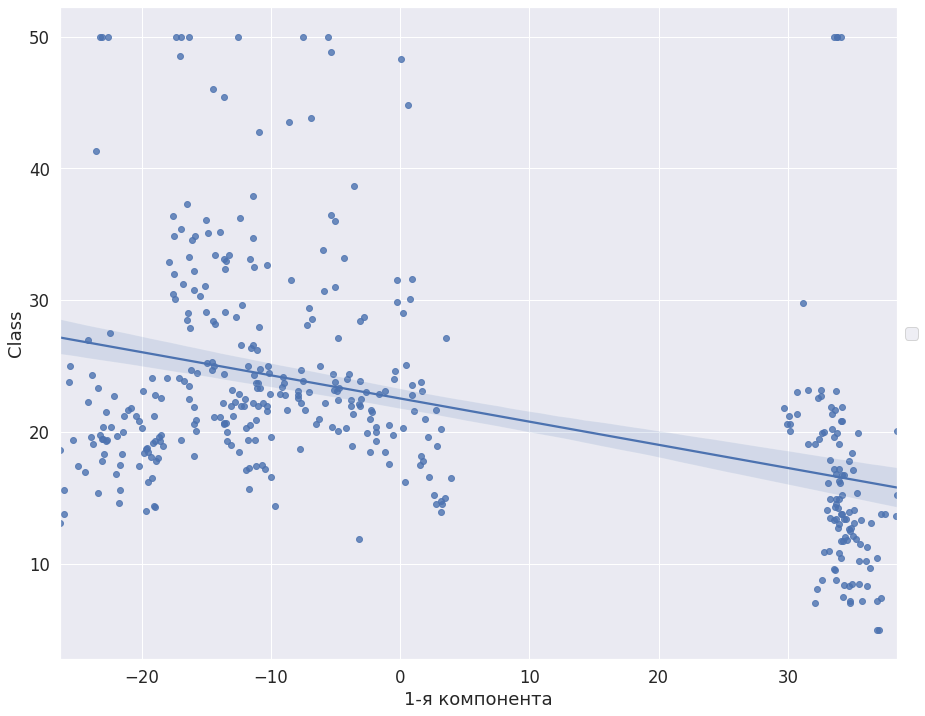

In [298]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 12))
g = sns.regplot(x = "1-я компонента", y = "Class", data = X_train_tsne)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

#Isolation Forest

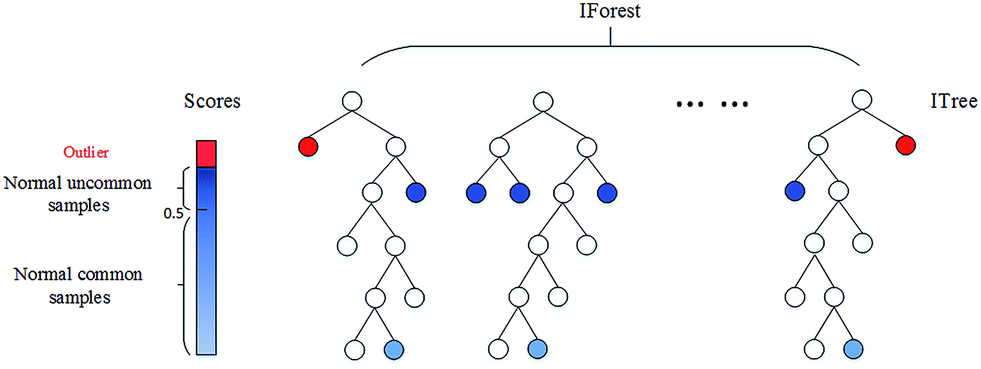

In [299]:
from sklearn.ensemble import IsolationForest

In [300]:
X_train.shape

(404, 13)

In [301]:
iso = IsolationForest(contamination = 0.1)
yhat = iso.fit_predict(X_train)

In [302]:
mask = yhat != -1

In [303]:
y_train_iso = y_train[mask]
X_train_iso = X_train[mask]

In [304]:
X_train_iso.shape

(363, 13)

In [305]:
X_train_iso = X_train_iso.reset_index(drop = True)
y_train_iso = y_train_iso.reset_index(drop = True)

In [306]:
%%time
iso_lr_score = get_score(lr, X_train_iso, y_train_iso, X_val, y_val)
print('Linear Regression MAE: ', iso_lr_score)

Linear Regression MAE:  3.420454620918083
CPU times: user 4.54 ms, sys: 2.03 ms, total: 6.56 ms
Wall time: 11 ms


In [307]:
%%time
iso_rf_score = get_score(rf, X_train_iso, y_train_iso, X_val, y_val)
print('Random Forest MAE: ', iso_rf_score)

Random Forest MAE:  2.72678431372549
CPU times: user 296 ms, sys: 1.05 ms, total: 297 ms
Wall time: 298 ms


#Minimum Covariance Determinant

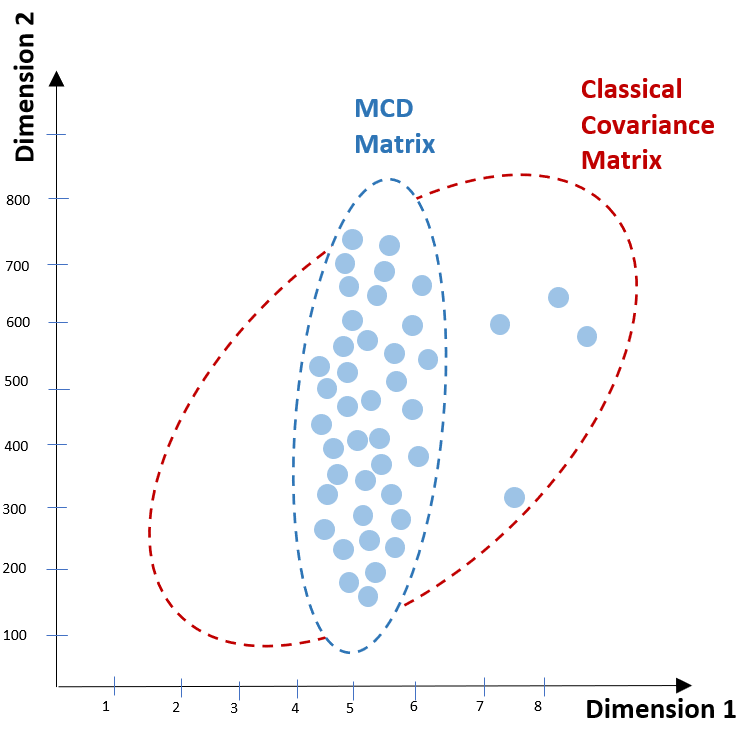

In [308]:
from sklearn.covariance import EllipticEnvelope

In [309]:
ee = EllipticEnvelope(contamination = 0.1)
yhat = ee.fit_predict(X_train)

In [310]:
mask = yhat != -1

In [311]:
y_train_ee = y_train[mask]
X_train_ee = X_train[mask]

In [312]:
X_train_iso.shape

(363, 13)

In [313]:
X_train_ee = X_train_ee.reset_index(drop = True)
y_train_ee = y_train_ee.reset_index(drop = True)

In [314]:
%%time
ee_lr_score = get_score(lr, X_train_ee, y_train_ee, X_val, y_val)
print('Linear Regression MAE: ', ee_lr_score)

Linear Regression MAE:  3.5422894388857373
CPU times: user 6.71 ms, sys: 4.04 ms, total: 10.8 ms
Wall time: 12.2 ms


In [315]:
%%time
ee_rf_score = get_score(rf, X_train_ee, y_train_ee, X_val, y_val)
print('Random Forest MAE: ', ee_rf_score)

Random Forest MAE:  2.912539215686274
CPU times: user 314 ms, sys: 34 ms, total: 348 ms
Wall time: 326 ms


#Local Outlier Factor

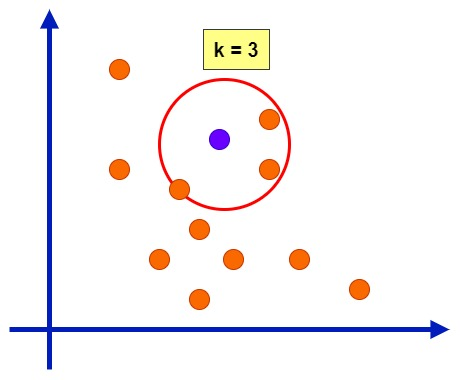

In [316]:
from sklearn.neighbors import LocalOutlierFactor

In [317]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [318]:
mask = yhat != -1

In [319]:
y_train_lof = y_train[mask]
X_train_lof = X_train[mask]

In [320]:
X_train_lof.shape

(372, 13)

In [321]:
X_train_lof = X_train_lof.reset_index(drop = True)
y_train_lof = y_train_lof.reset_index(drop = True)

In [322]:
%%time
lof_lr_score = get_score(lr, X_train_lof, y_train_lof, X_val, y_val)
print('Linear Regression MAE: ', lof_lr_score)

Linear Regression MAE:  3.5555491460697706
CPU times: user 4.35 ms, sys: 10 µs, total: 4.36 ms
Wall time: 4.57 ms


In [323]:
%%time
lof_rf_score = get_score(rf, X_train_lof, y_train_lof, X_val, y_val)
print('Random Forest MAE: ', lof_rf_score)

Random Forest MAE:  2.814029411764706
CPU times: user 318 ms, sys: 1.95 ms, total: 320 ms
Wall time: 322 ms


#One-Class SVM

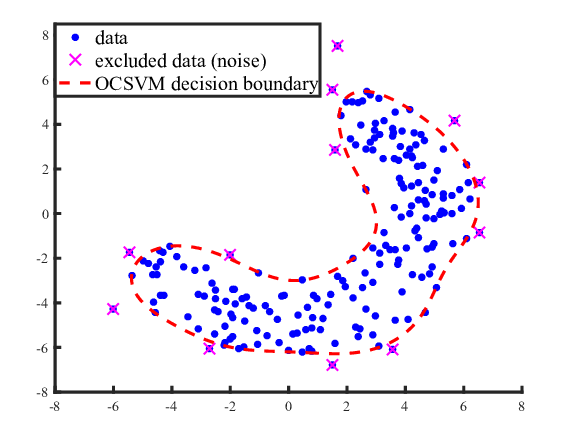

In [324]:
from sklearn.svm import OneClassSVM

In [325]:
ocsvm = OneClassSVM(nu = 0.1)
yhat = ocsvm.fit_predict(X_train)

In [326]:
mask = yhat != -1

In [327]:
y_train_ocsvm = y_train[mask]
X_train_ocsvm = X_train[mask]

In [328]:
X_train_ocsvm.shape

(363, 13)

In [329]:
X_train_ocsvm = X_train_ocsvm.reset_index(drop = True)
y_train_ocsvm = y_train_ocsvm.reset_index(drop = True)

In [330]:
%%time
ocsvm_lr_score = get_score(lr, X_train_ocsvm, y_train_ocsvm, X_val, y_val)
print('Linear Regression MAE: ', ocsvm_lr_score)

Linear Regression MAE:  3.466160928888714
CPU times: user 5.42 ms, sys: 13 µs, total: 5.43 ms
Wall time: 6.61 ms


In [331]:
%%time
ocsvm_rf_score = get_score(rf, X_train_ocsvm, y_train_ocsvm, X_val, y_val)
print('Random Forest MAE: ', ocsvm_rf_score)

Random Forest MAE:  2.9175784313725504
CPU times: user 309 ms, sys: 946 µs, total: 310 ms
Wall time: 313 ms


#Пора сравнивать

In [332]:
mae_lr = [baseline_lr_score, iso_lr_score, ee_lr_score, lof_lr_score, ocsvm_lr_score]
mae_rf = [baseline_rf_score, iso_rf_score, ee_rf_score, lof_rf_score, ocsvm_rf_score]
methods = ['Baseline', 'Isolation Forest', 'Minimum Covariance Determinant', 'Local Outlier Factor', 'One-Class SVM']

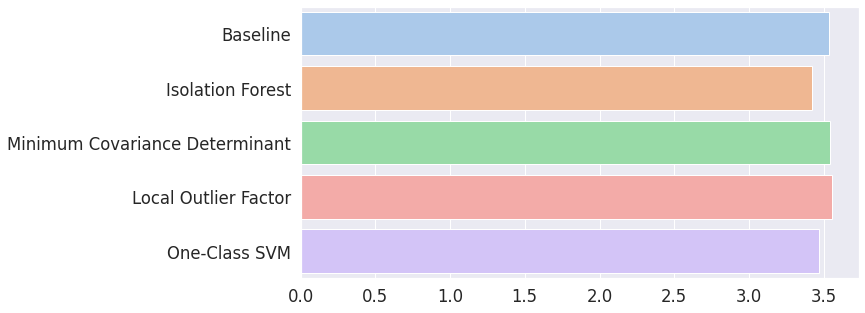

In [333]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(y = methods, x = mae_lr, palette = 'pastel', orient = 'h');

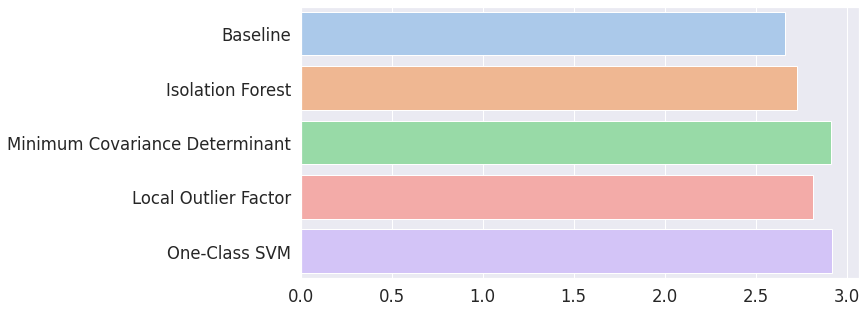

In [334]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(y = methods, x = mae_rf, palette = 'pastel', orient = 'h');